Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Gathering

In [2]:
df = pd.read_csv('ds_data.csv')

Data Preprocessing

In [3]:
df.head()

,DS_CAST_NO,DS_DS_NO,HM Wt,HM Temp,HM S,Aim S,Act Mg,Act Lime,ADS
0,T98555,1,163.9,1394.0,0.053,0.012,79,248,0.019
1,T98280,2,172.4,1382.0,0.035,0.012,70,324,0.017
2,T96855,1,159.4,1359.0,0.065,0.012,71,411,0.020
3,T94242,2,158.9,1346.0,0.048,0.012,101,257,0.024
4,T99792,1,160.0,1399.0,0.023,0.012,82,331,0.020


In [4]:
df.sample()

,DS_CAST_NO,DS_DS_NO,HM Wt,HM Temp,HM S,Aim S,Act Mg,Act Lime,ADS
14356,T94242,2,167.9,1348.0,0.066,0.012,72,308,0.017


In [5]:
df.shape

(15000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DS_CAST_NO  15000 non-null  object 
 1   DS_DS_NO    15000 non-null  int64  
 2   HM Wt       15000 non-null  float64
 3   HM Temp     14250 non-null  float64
 4   HM S        15000 non-null  float64
 5   Aim S       15000 non-null  float64
 6   Act Mg      15000 non-null  int64  
 7   Act Lime    15000 non-null  int64  
 8   ADS         15000 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

,0
DS_CAST_NO,0
DS_DS_NO,0
HM Wt,0
HM Temp,750
HM S,0
Aim S,0
Act Mg,0
Act Lime,0
ADS,0


In [8]:
# Step 1: Convert to string and remove non-numeric characters using regex
df['HM Temp'] = df['HM Temp'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Step 2: Convert to numeric
df['HM Temp'] = pd.to_numeric(df['HM Temp'], errors='coerce')

# Step 3: Fill missing with median
median_temp = df['HM Temp'].median()
print(f"Median temperature: {median_temp:.2f}")

df['HM Temp'] = df['HM Temp'].fillna(median_temp)

# Final check
print(f"Missing values after filling: {df['HM Temp'].isnull().sum()}")

Median temperature: 1370.00
Missing values after filling: 0


In [9]:
# Step 1: Convert to string and clean non-numeric characters (commas, spaces, etc.)
df['Act Lime'] = df['Act Lime'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Step 2: Convert to float
df['Act Lime'] = pd.to_numeric(df['Act Lime'], errors='coerce')

In [10]:
df.isnull().sum()

,0
DS_CAST_NO,0
DS_DS_NO,0
HM Wt,0
HM Temp,0
HM S,0
Aim S,0
Act Mg,0
Act Lime,0
ADS,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DS_CAST_NO  15000 non-null  object 
 1   DS_DS_NO    15000 non-null  int64  
 2   HM Wt       15000 non-null  float64
 3   HM Temp     15000 non-null  float64
 4   HM S        15000 non-null  float64
 5   Aim S       15000 non-null  float64
 6   Act Mg      15000 non-null  int64  
 7   Act Lime    15000 non-null  int64  
 8   ADS         15000 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.0+ MB


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
print(df['Aim S'].nunique())  # If output is 1, confirm it's constant

1


In [14]:
#dropping these column since these have no effect on ADS. Also dropping Aim S since same for all values
df = df.drop(columns=['DS_CAST_NO', 'DS_DS_NO','Aim S'])

In [15]:
df.sample()

,HM Wt,HM Temp,HM S,Act Mg,Act Lime,ADS
12706,181.6,1400.0,0.031,68,321,0.014


In [16]:
df.corr()

,HM Wt,HM Temp,HM S,Act Mg,Act Lime,ADS
HM Wt,1.000000,-0.004270,-0.002747,0.010209,0.000026,-0.076384
HM Temp,-0.004270,1.000000,0.004058,-0.001921,0.002045,-0.014584
HM S,-0.002747,0.004058,1.000000,-0.005708,0.001951,0.286309
Act Mg,0.010209,-0.001921,-0.005708,1.000000,-0.002725,0.699674
Act Lime,0.000026,0.002045,0.001951,-0.002725,1.000000,0.434469
ADS,-0.076384,-0.014584,0.286309,0.699674,0.434469,1.000000


In [17]:
df.describe()

,HM Wt,HM Temp,HM S,Act Mg,Act Lime,ADS
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,165.024860,1370.099067,0.045028,69.542933,319.637000,0.017289
std,6.964618,24.416064,0.014328,11.921097,49.815356,0.003389
min,133.700000,1271.000000,0.020000,40.000000,200.000000,0.005000
25%,160.300000,1354.000000,0.033000,61.000000,286.000000,0.015000
50%,165.000000,1370.000000,0.045000,70.000000,320.000000,0.017000
75%,169.800000,1386.000000,0.057250,78.000000,353.000000,0.020000
max,194.000000,1472.000000,0.070000,110.000000,500.000000,0.030000


**EDA**

Univariate

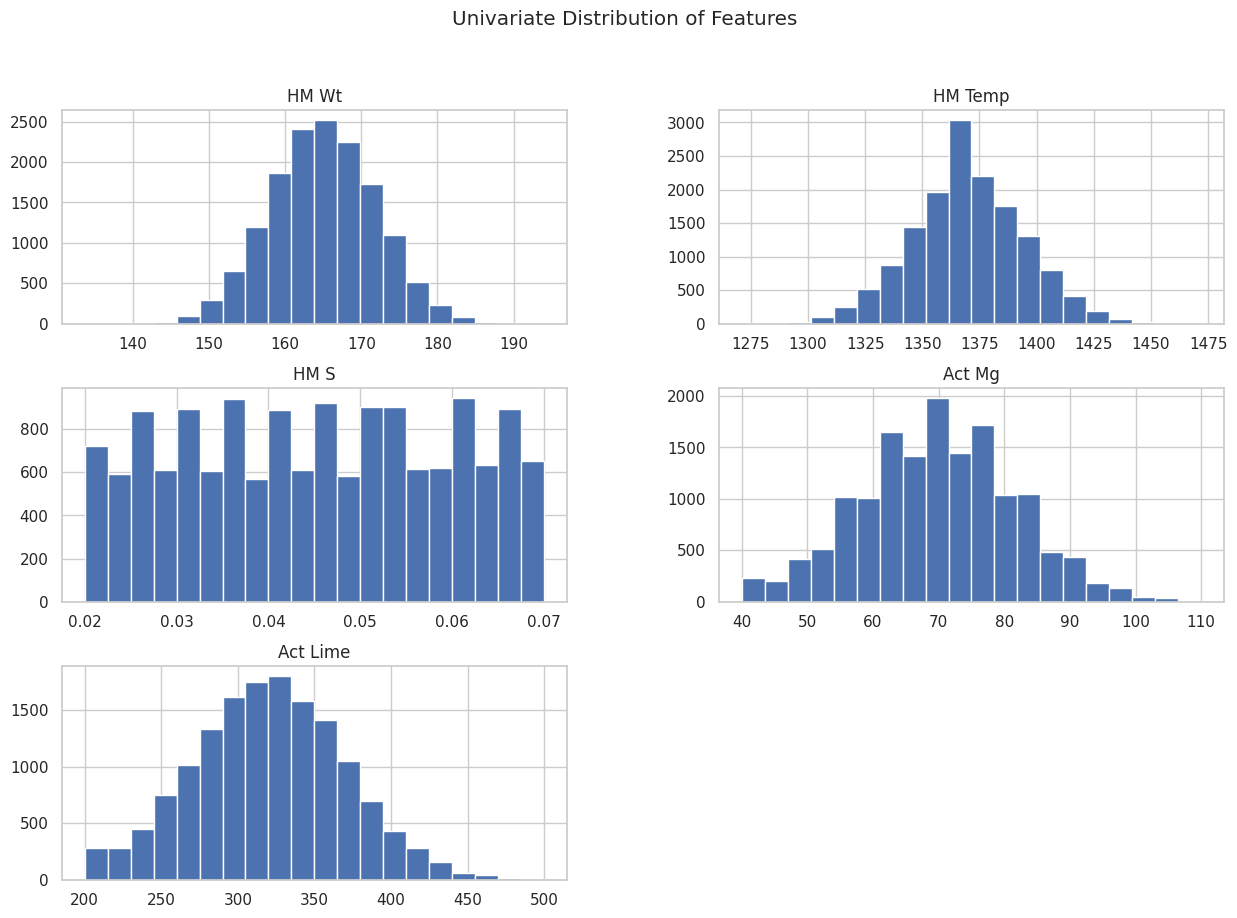

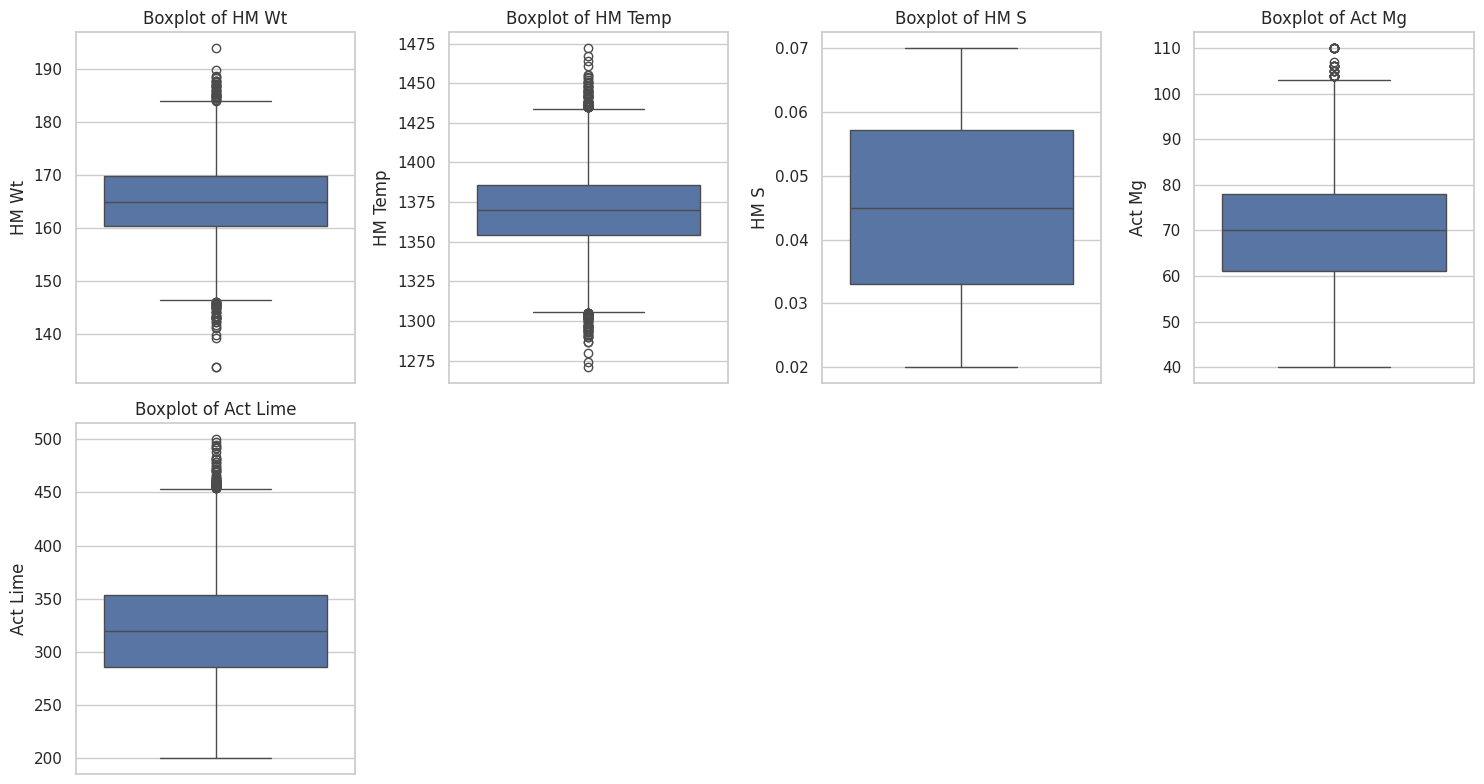

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")
features = df.columns.drop("ADS")  # exclude target for now

# Histograms
df[features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution of Features")
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Bivariate Analysis

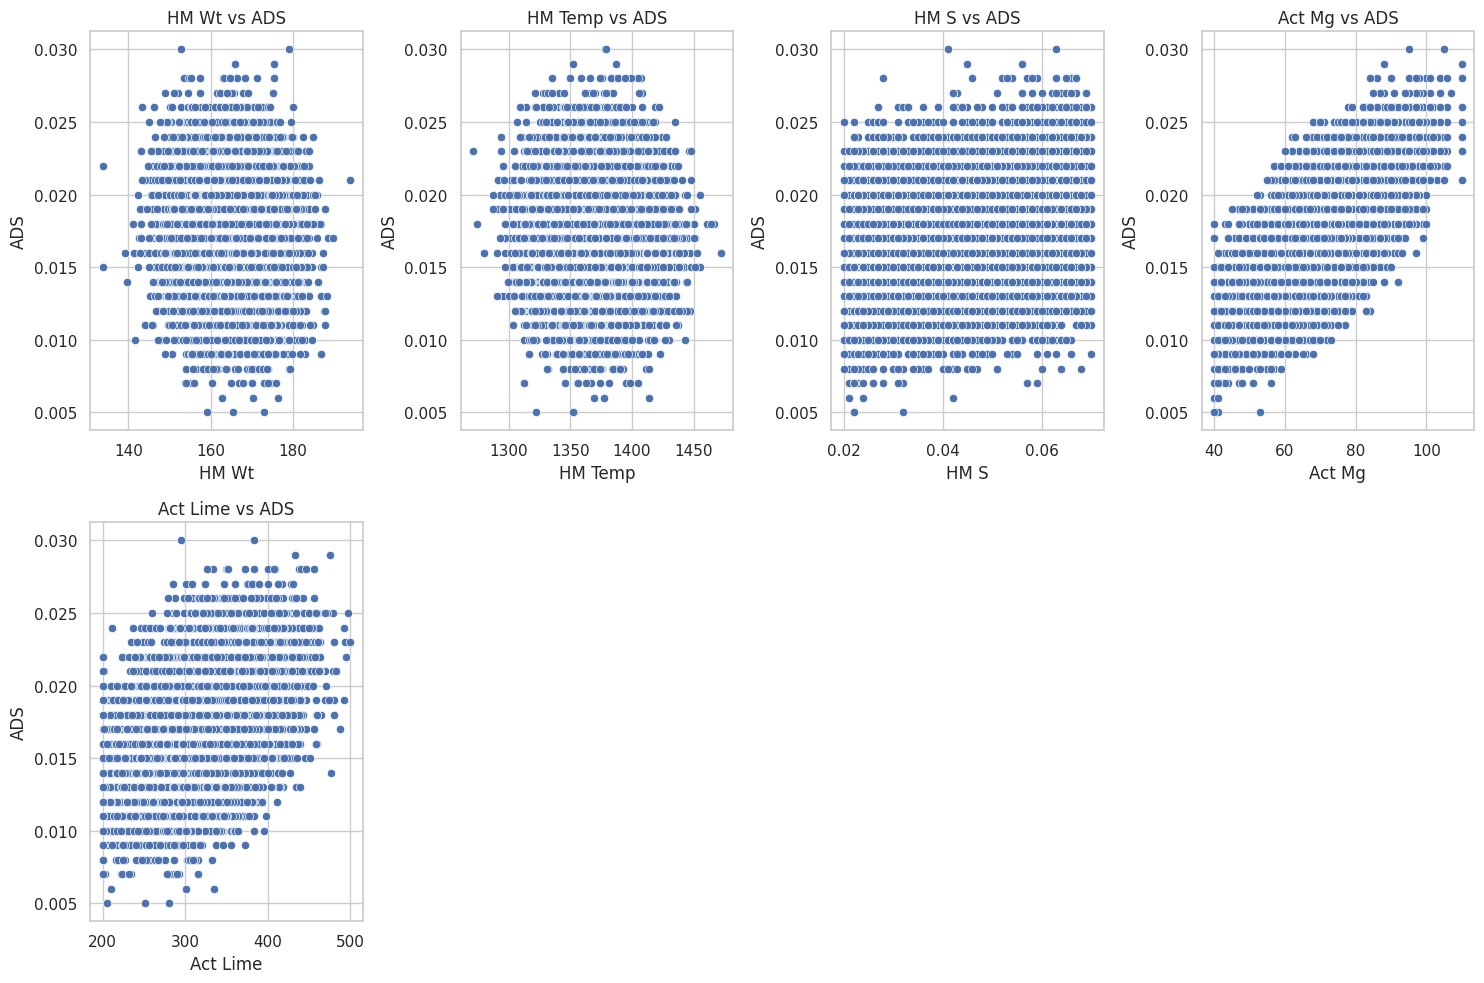

In [19]:
# Scatter plots: Feature vs ADS
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=df[col], y=df['ADS'])
    plt.title(f'{col} vs ADS')
plt.tight_layout()
plt.show()

Multivariate Analysis

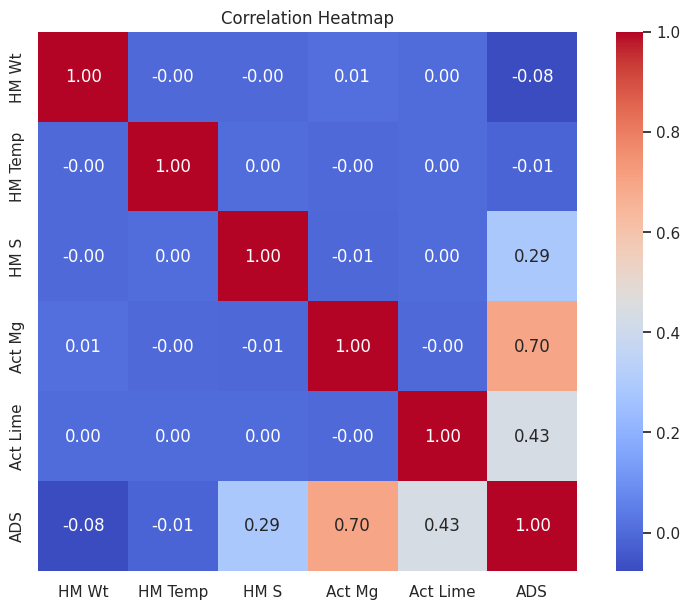

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 7))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

Feature Engineering

In [21]:
import numpy as np

# For continuous variables
continuous_vars = ['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime']

# Calculate statistical features
for var in continuous_vars:
    # Skip if column has missing values (handle those first)
    if df[var].isnull().sum() > 0:
        df[var].fillna(df[var].mean(), inplace=True)

    df[f'{var}_mean'] = df[var].mean()
    df[f'{var}_std'] = df[var].std()
    df[f'{var}_skew'] = df[var].skew()
    df[f'{var}_kurt'] = df[var].kurtosis()
    df[f'{var}_q25'] = df[var].quantile(0.25)
    df[f'{var}_q50'] = df[var].quantile(0.50)
    df[f'{var}_q75'] = df[var].quantile(0.75)

In [22]:
# Normalized features
df['Act_Mg_per_Wt'] = df['Act Mg'] / df['HM Wt']
df['Act_Lime_per_Wt'] = df['Act Lime'] / df['HM Wt']
df['Mg_to_Lime_Ratio'] = df['Act Mg'] / df['Act Lime']

In [23]:
# Energy-related features
df['Temp_per_Wt'] = df['HM Temp'] / df['HM Wt']
df['Chemical_Usage'] = (df['Act Mg'] + df['Act Lime']) / df['HM Wt']

# Deviation features
df['Mg_Lime_Combined'] = df['Act Mg'] + df['Act Lime']

In [24]:
# Physical process interactions
df['Temp_Mg_Interaction'] = df['HM Temp'] * df['Act Mg']
df['Temp_Lime_Interaction'] = df['HM Temp'] * df['Act Lime']
df['Wt_Temp_Interaction'] = df['HM Wt'] * df['HM Temp']

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 20 features (adjust number as needed)
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(df.drop('ADS', axis=1), df['ADS'])

# Get selected feature names
selected_features = df.drop('ADS', axis=1).columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

Selected features: ['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime', 'HM Wt_std', 'HM Wt_kurt', 'HM Temp_kurt', 'HM S_std', 'HM S_q25', 'Act Lime_skew', 'Act_Mg_per_Wt', 'Act_Lime_per_Wt', 'Mg_to_Lime_Ratio', 'Temp_per_Wt', 'Chemical_Usage', 'Mg_Lime_Combined', 'Temp_Mg_Interaction', 'Temp_Lime_Interaction', 'Wt_Temp_Interaction']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


Model Training

In [26]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Recreate X and y after cleaning
X = df.drop(columns=['ADS'])
y = df['ADS']

# Feature Engineering: Add interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Feature names after transformation (optional for display)
feature_names = poly.get_feature_names_out(X.columns)

# Train/test split again
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

In [27]:
#Train Test Split
from sklearn.model_selection import train_test_split

# Drop 'ADS' (target) and 'Aim S' (non-informative for modeling)
X = df.drop(columns=['ADS'])  # Features
y = df['ADS']                          # Target

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: print shapes to verify
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (12000, 49) (12000,)
Test shape: (3000, 49) (3000,)


In [28]:
# Linear Regression
 # 1. Drop unwanted columns
X = df.drop(columns=['ADS'])
y = df['ADS']

# 2. Clean: Convert comma strings to float
for col in X.columns:
    X[col] = X[col].astype(str).str.replace(',', '').astype(float)

# 3. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 6. Prediction & Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"MAE: {mae:.5f}")
print(f"MSE: {mse:.5f}")
print(f"R² Score: {r2:.5f}")


Linear Regression Results:
MAE: 0.00129
MSE: 0.00000
R² Score: 0.77208


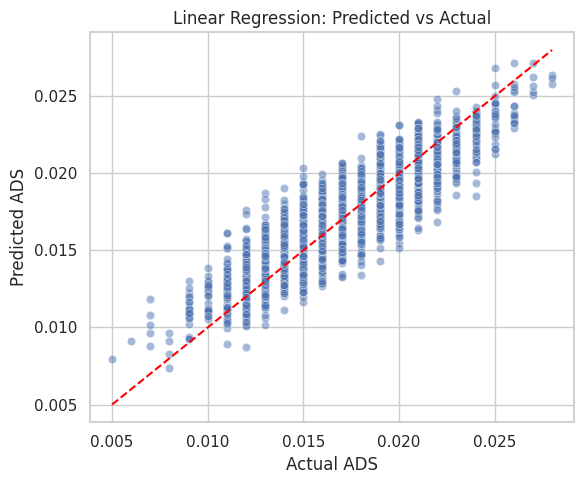

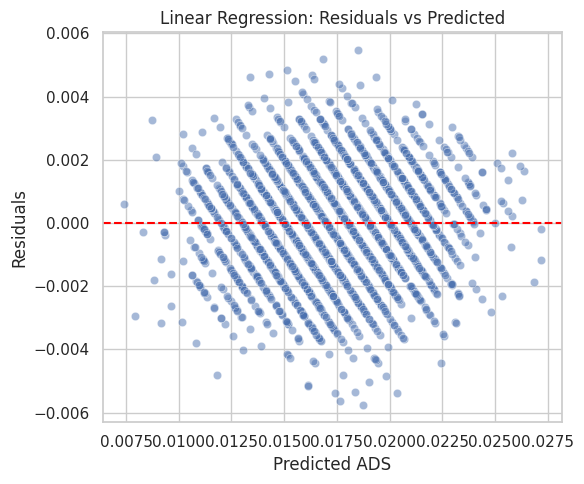

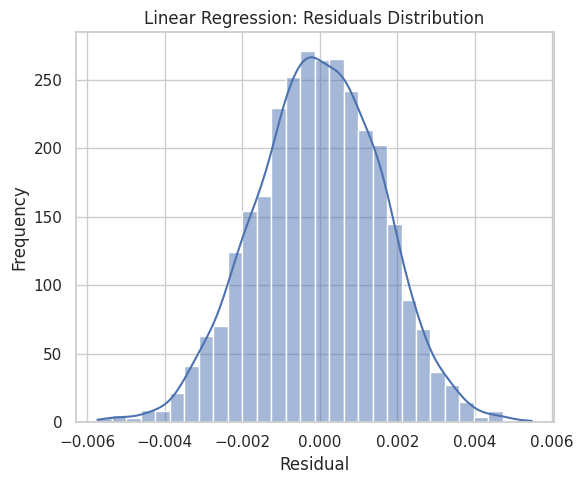

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Linear Regression Predictions
y_pred_lr = model.predict(X_test_scaled)
residuals = y_test - y_pred_lr

# 1. Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Linear Regression: Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test_scaled)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest Results:")
print(f"MAE: {rf_mae:.5f}")
print(f"MSE: {rf_mse:.5f}")
print(f"R² Score: {rf_r2:.5f}")

Random Forest Results:
MAE: 0.00135
MSE: 0.00000
R² Score: 0.75145


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


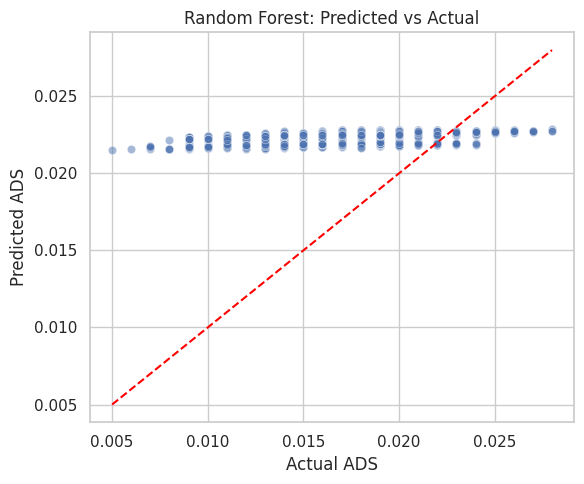

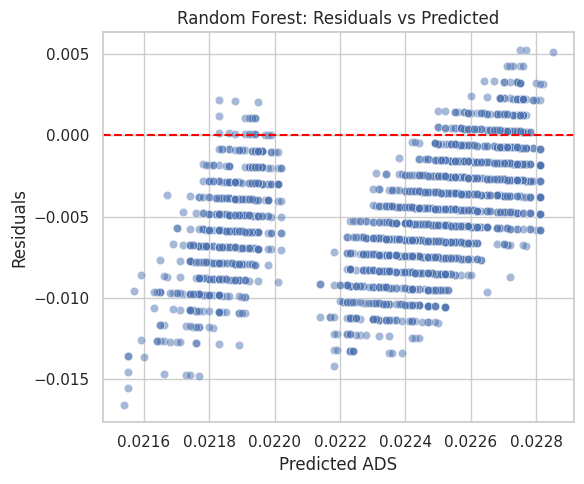

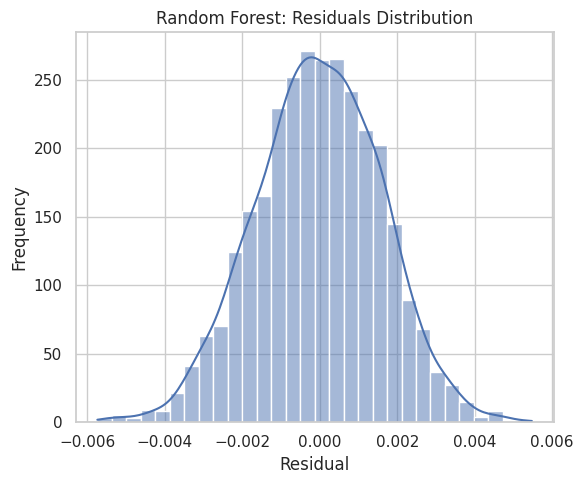

In [31]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
residuals_rf = y_test - y_pred_rf

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Random Forest: Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()





In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Clean Data
X = df.drop(columns=['ADS'])
y = df['ADS']

# Convert comma strings to float
for col in X.columns:
    X[col] = X[col].astype(str).str.replace(',', '').astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.5f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_xgb):.5f}")
print(f"R² Score: {r2_score(y_test, y_pred_xgb):.5f}")

XGBoost Results:
MAE: 0.00132
MSE: 0.00000
R² Score: 0.76290


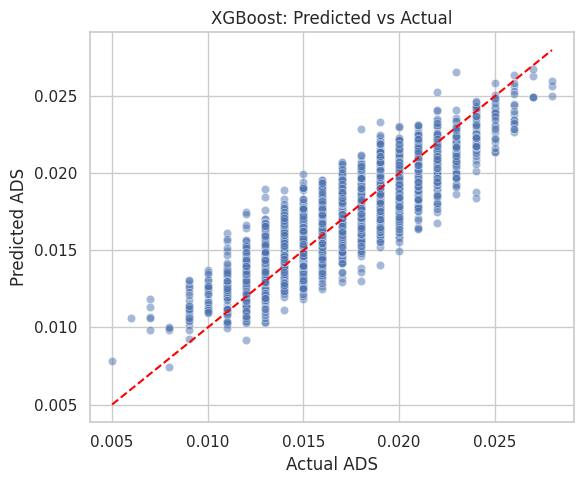

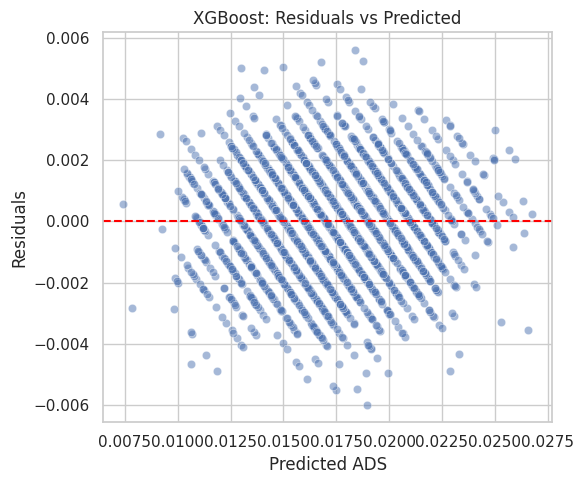

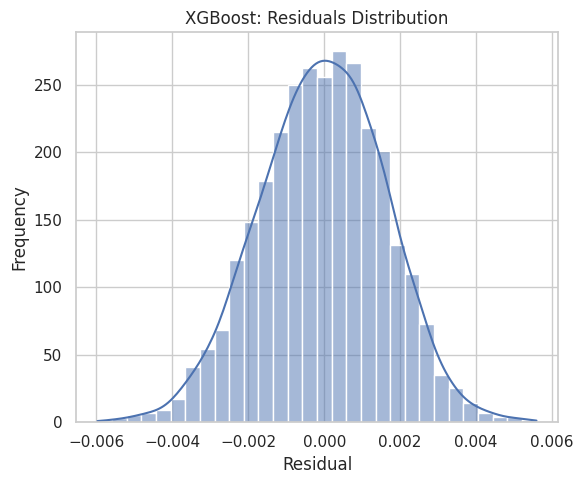

In [33]:
# XGBoost Predictions
y_pred_xgb = xgb_model.predict(X_test)
residuals_xgb = y_test - y_pred_xgb

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("XGBoost: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.title("XGBoost: Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()




In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare data
X = df.drop(columns=['ADS'])
y = df['ADS']

# Handle comma strings if any
for col in X.columns:
    X[col] = X[col].astype(str).str.replace(',', '').astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Results:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_knn):.5f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.5f}")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.5f}")


KNN Results:
MAE: 0.00143
MSE: 0.00000
R² Score: 0.71687


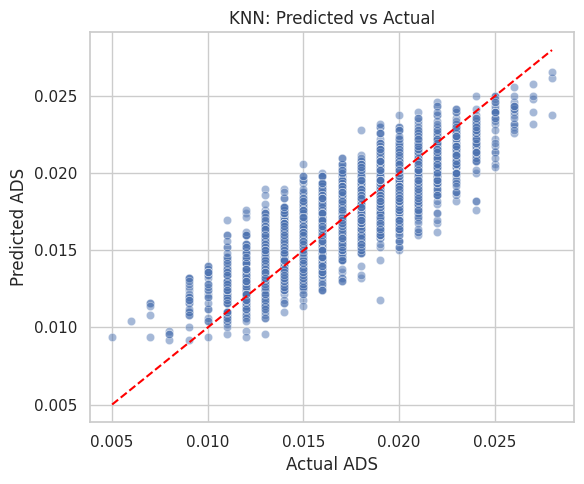

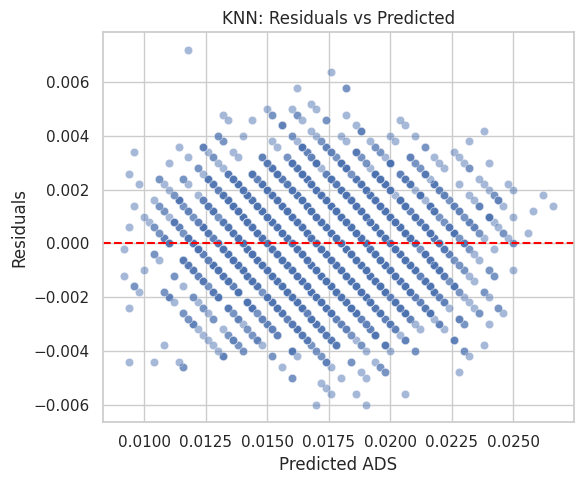

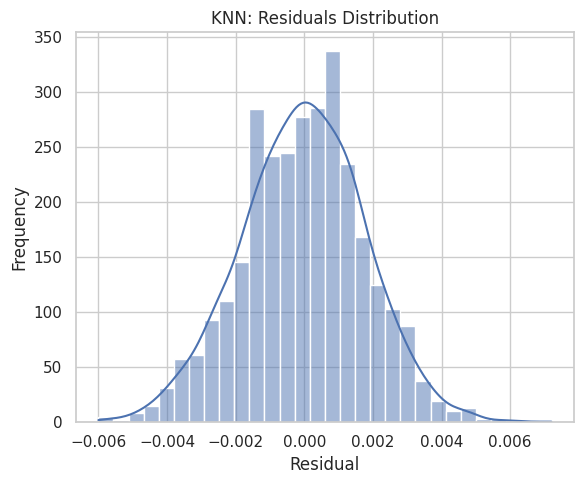

In [35]:
# KNN Predictions
y_pred_knn = knn_model.predict(X_test_scaled)
residuals_knn = y_test - y_pred_knn

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("KNN: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_pred_knn, y=residuals_knn, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("KNN: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals_knn, bins=30, kde=True)
plt.title("KNN: Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare Data
X = df.drop(columns=['ADS'])
y = df['ADS']

# Clean formatting (remove commas if present)
for col in X.columns:
    X[col] = X[col].astype(str).str.replace(',', '').astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for KNN and Linear
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base Models
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit individual models
xgb.fit(X_train, y_train)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)

# Ensemble Model
ensemble = VotingRegressor([
    ('xgb', xgb),
    ('lr', lr),
    ('rf', rf),
    ('knn', knn)
])

# Use scaled data only where needed
# So we prepare a custom training input that handles model-specific formats
class CustomVotingRegressor(VotingRegressor):
    def fit(self, X, y):
        return super().fit(X, y)

    def predict(self, X):
        return super().predict(X)

# Fit ensemble (XGBoost and RF use original features, LR and KNN use scaled ones)
ensemble.fit(X_train, y_train)  # VotingRegressor internally calls `.predict()` on each model

# Predict & Evaluate
y_pred_ensemble = ensemble.predict(X_test)

print("Ensemble Results (XGB + Linear + RF + KNN):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ensemble):.5f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ensemble):.5f}")
print(f"R² Score: {r2_score(y_test, y_pred_ensemble):.5f}")


Ensemble Results (XGB + Linear + RF + KNN):
MAE: 0.00134
MSE: 0.00000
R² Score: 0.75724


In [37]:
# Simple average ensemble
# Simple average ensemble
normal_ensemble_pred = (y_pred_xgb + y_pred_lr + y_pred_rf + y_pred_knn) / 4
residuals_normal_ensemble = y_test - normal_ensemble_pred



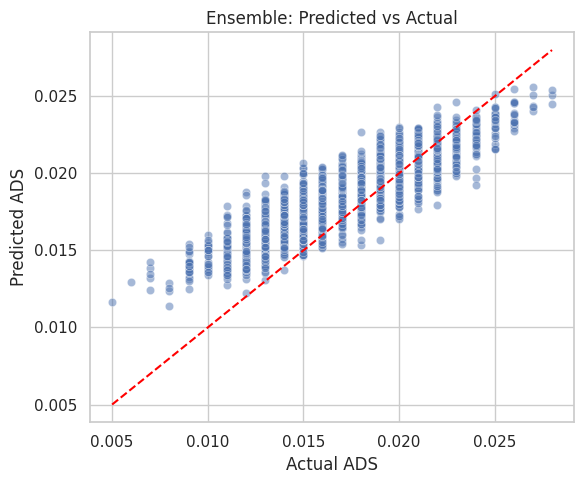

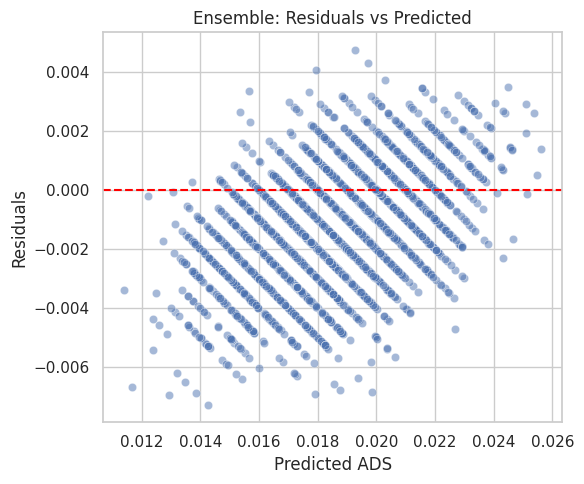

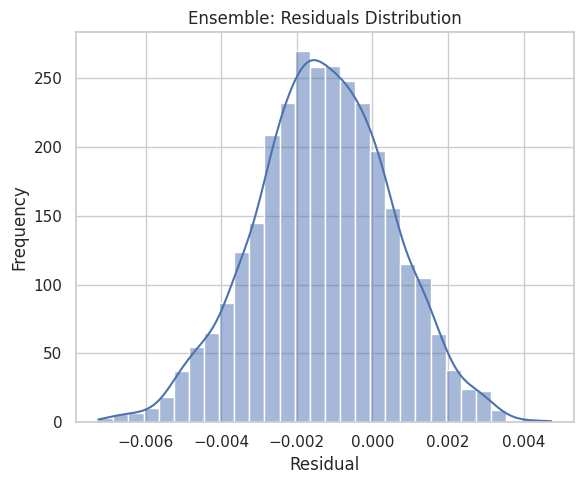

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=normal_ensemble_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("Ensemble: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=normal_ensemble_pred, y=residuals_normal_ensemble, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("Ensemble: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals_normal_ensemble, bins=30, kde=True)
plt.title("Ensemble: Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
pip install pyswarm


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4463 sha256=14054d3713e04bc1407ba3baf02c326c8cdafa2f9f4a0d8042b851c849a232b4
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from pyswarm import pso

# --- Prepare Data ---
X = df.drop(columns=['ADS'])
y = df['ADS']

# Remove commas if any
for col in X.columns:
    X[col] = X[col].astype(str).str.replace(',', '').astype(float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for LR and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train Base Models ---
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

xgb.fit(X_train, y_train)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)

# Get Predictions on test set
pred_xgb = xgb.predict(X_test)
pred_lr = lr.predict(X_test_scaled)
pred_rf = rf.predict(X_test)
pred_knn = knn.predict(X_test_scaled)

pred_matrix = np.vstack([pred_xgb, pred_lr, pred_rf, pred_knn])  # shape: (4, n_samples)

# --- PSO Objective Function ---
def mse_loss(weights):
    weights = np.array(weights)
    weights = weights / weights.sum()  # Normalize weights to sum = 1
    final_pred = np.dot(weights, pred_matrix)
    return mean_squared_error(y_test, final_pred)

# --- PSO Optimization ---
lb = [0] * 4  # Lower bounds
ub = [1] * 4  # Upper bounds

best_weights, _ = pso(mse_loss, lb, ub, swarmsize=50, maxiter=100, debug=False)

# Normalize weights
best_weights = best_weights / best_weights.sum()

# Final prediction using optimized weights
final_pred = np.dot(best_weights, pred_matrix)

# --- Final Evaluation ---
print("Optimized Ensemble using PSO:")
print(f"Weights: XGB={best_weights[0]:.2f}, LR={best_weights[1]:.2f}, RF={best_weights[2]:.2f}, KNN={best_weights[3]:.2f}")
print(f"MAE: {mean_absolute_error(y_test, final_pred):.5f}")
print(f"MSE: {mean_squared_error(y_test, final_pred):.5f}")
print(f"R² Score: {r2_score(y_test, final_pred):.5f}")


Stopping search: Swarm best objective change less than 1e-08
Optimized Ensemble using PSO:
Weights: XGB=0.29, LR=0.58, RF=0.00, KNN=0.13
MAE: 0.00130
MSE: 0.00000
R² Score: 0.77021


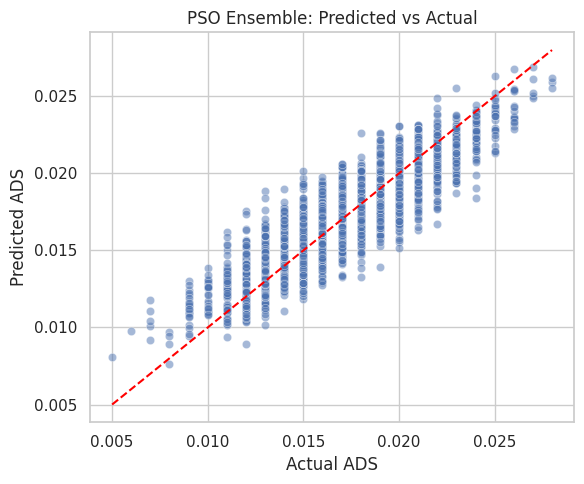

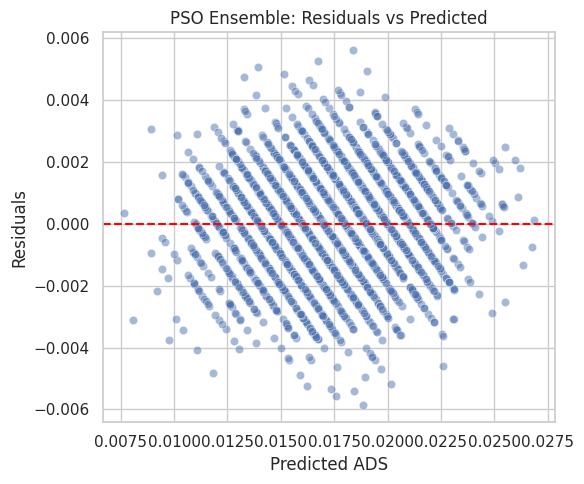

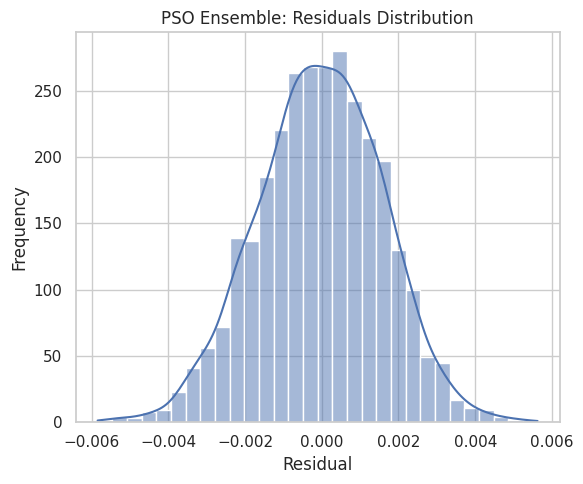

/tmp/ipython-input-41-900022588.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=best_weights, palette='pastel')


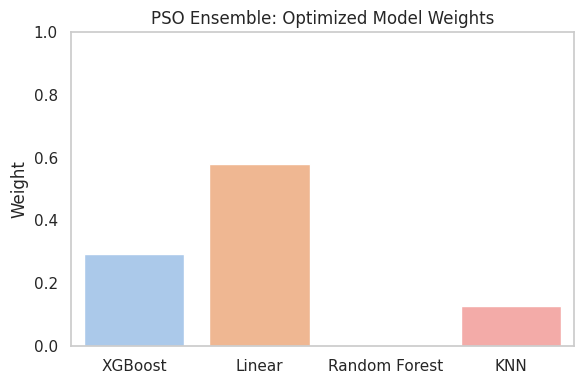

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Residuals
residuals_ensemble = y_test - final_pred

# 1. Predicted vs Actual
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=final_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("PSO Ensemble: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residuals vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=final_pred, y=residuals_ensemble, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("PSO Ensemble: Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(6, 5))
sns.histplot(residuals_ensemble, bins=30, kde=True)
plt.title("PSO Ensemble: Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. PSO-Optimized Weights
models = ['XGBoost', 'Linear', 'Random Forest', 'KNN']
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=best_weights, palette='pastel')
plt.title("PSO Ensemble: Optimized Model Weights")
plt.ylabel("Weight")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Check my trained models on test data

In [43]:
# Load test data
test_df = pd.read_csv("test_data.csv")  # Replace with actual file path



In [44]:
test_df.shape

(100, 9)

In [45]:
test_df.isnull().sum()

,0
DS_CAST_NO,0
DS_DS_NO,0
HM Wt,0
HM Temp,5
HM S,0
Aim S,0
Act Mg,0
Act Lime,0
ADS,0


In [46]:
#dropping these column since these have no effect on ADS. Also dropping Aim S since same for all values
test_df = test_df.drop(columns=['DS_CAST_NO', 'DS_DS_NO','Aim S'])

In [47]:
import numpy as np

# For continuous variables
continuous_vars = ['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime']

# Calculate statistical features
for var in continuous_vars:
    # Skip if column has missing values (handle those first)
    if test_df[var].isnull().sum() > 0:
        test_df[var].fillna(test_df[var].mean(), inplace=True)

    test_df[f'{var}_mean'] = test_df[var].mean()
    test_df[f'{var}_std'] = test_df[var].std()
    test_df[f'{var}_skew'] = test_df[var].skew()
    test_df[f'{var}_kurt'] = test_df[var].kurtosis()
    test_df[f'{var}_q25'] = test_df[var].quantile(0.25)
    test_df[f'{var}_q50'] = test_df[var].quantile(0.50)
    test_df[f'{var}_q75'] = test_df[var].quantile(0.75)

/tmp/ipython-input-47-1818859676.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[var].fillna(test_df[var].mean(), inplace=True)


In [48]:
# Normalized features
test_df['Act_Mg_per_Wt'] = test_df['Act Mg'] / test_df['HM Wt']
test_df['Act_Lime_per_Wt'] = test_df['Act Lime'] / test_df['HM Wt']
test_df['Mg_to_Lime_Ratio'] = test_df['Act Mg'] / test_df['Act Lime']

In [49]:
# Energy-related features
test_df['Temp_per_Wt'] = test_df['HM Temp'] / test_df['HM Wt']
test_df['Chemical_Usage'] = (test_df['Act Mg'] + test_df['Act Lime']) / test_df['HM Wt']

# Deviation features
test_df['Mg_Lime_Combined'] = test_df['Act Mg'] + test_df['Act Lime']

In [50]:
# Physical process interactions
test_df['Temp_Mg_Interaction'] = test_df['HM Temp'] * test_df['Act Mg']
test_df['Temp_Lime_Interaction'] = test_df['HM Temp'] * test_df['Act Lime']
test_df['Wt_Temp_Interaction'] = test_df['HM Wt'] * test_df['HM Temp']

In [51]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 20 features (adjust number as needed)
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(test_df.drop('ADS', axis=1), test_df['ADS'])

# Get selected feature names
selected_features = test_df.drop('ADS', axis=1).columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

Selected features: ['HM Wt', 'HM Temp', 'HM S', 'Act Mg', 'Act Lime', 'HM Wt_std', 'HM Temp_skew', 'HM Temp_kurt', 'HM Temp_q50', 'Act Mg_skew', 'Act Mg_kurt', 'Act_Mg_per_Wt', 'Act_Lime_per_Wt', 'Mg_to_Lime_Ratio', 'Temp_per_Wt', 'Chemical_Usage', 'Mg_Lime_Combined', 'Temp_Mg_Interaction', 'Temp_Lime_Interaction', 'Wt_Temp_Interaction']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:381: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


In [52]:
# Separate features
X_test_new = test_df.drop(columns=['ADS'])
y_test_new = test_df['ADS']

# Format numeric fields (if needed)
for col in X_test_new.columns:
    X_test_new[col] = X_test_new[col].astype(str).str.replace(',', '').astype(float)

# Scale for models that require it (Linear, KNN)
X_test_new_scaled = scaler.transform(X_test_new)

Step 2: Predict with Each Trained Model

In [53]:
# Individual model predictions
y_pred_lr_new = lr.predict(X_test_new_scaled)
y_pred_rf_new = rf.predict(X_test_new)
y_pred_xgb_new = xgb.predict(X_test_new)
y_pred_knn_new = knn.predict(X_test_new_scaled)

# PSO Ensemble Prediction
pred_matrix_new = np.vstack([y_pred_xgb_new, y_pred_lr_new, y_pred_rf_new, y_pred_knn_new])
y_pred_pso_ensemble = np.dot(best_weights, pred_matrix_new)

# Normal Ensemble Prediction
y_pred_normal_ensemble = pred_matrix_new.mean(axis=0)


Step 3: Evaluate (MAE, MSE, R²)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance on New Test Data:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.5f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.5f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.5f}")

evaluate_model("Linear Regression", y_test_new, y_pred_lr_new)
evaluate_model("Random Forest", y_test_new, y_pred_rf_new)
evaluate_model("XGBoost", y_test_new, y_pred_xgb_new)
evaluate_model("KNN", y_test_new, y_pred_knn_new)
evaluate_model("Normal Ensemble", y_test_new, y_pred_normal_ensemble)
evaluate_model("PSO Ensemble", y_test_new, y_pred_pso_ensemble)



Linear Regression Performance on New Test Data:
MAE: 0.00144
MSE: 0.00000
R² Score: 0.77689

Random Forest Performance on New Test Data:
MAE: 0.00148
MSE: 0.00000
R² Score: 0.76264

XGBoost Performance on New Test Data:
MAE: 0.00146
MSE: 0.00000
R² Score: 0.77615

KNN Performance on New Test Data:
MAE: 0.00163
MSE: 0.00000
R² Score: 0.74677

Normal Ensemble Performance on New Test Data:
MAE: 0.00147
MSE: 0.00000
R² Score: 0.77577

PSO Ensemble Performance on New Test Data:
MAE: 0.00145
MSE: 0.00000
R² Score: 0.77912


Step 4: Plot Results

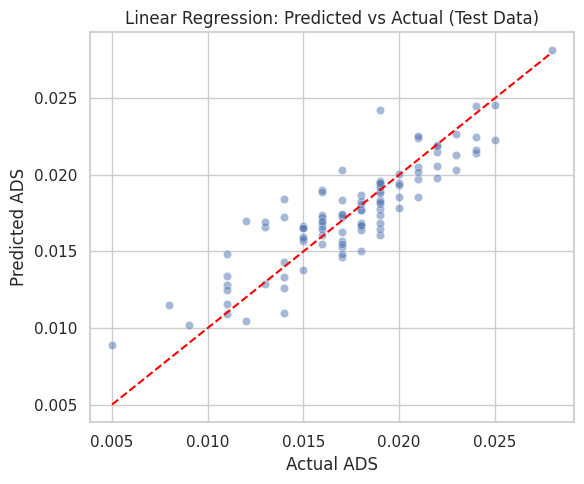

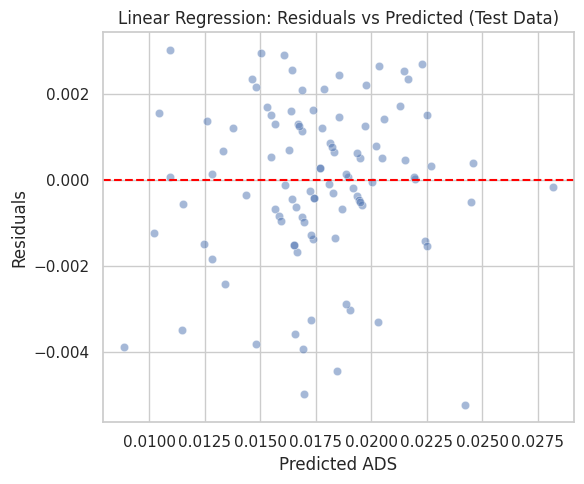

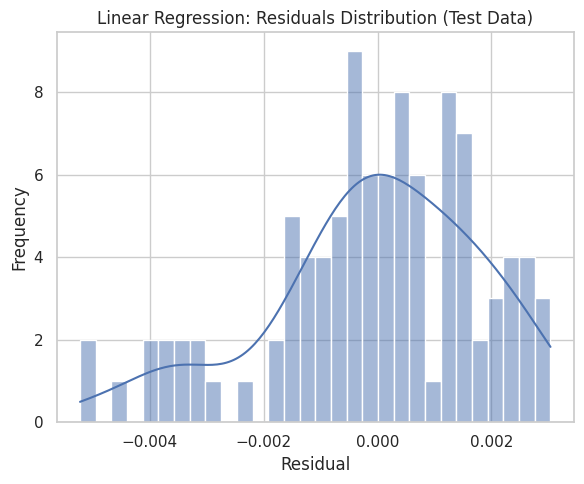

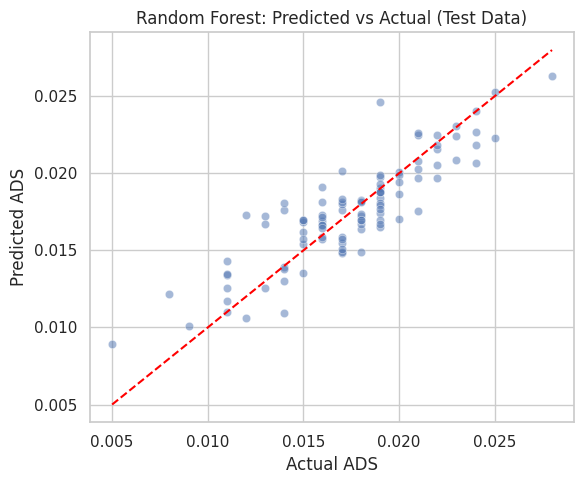

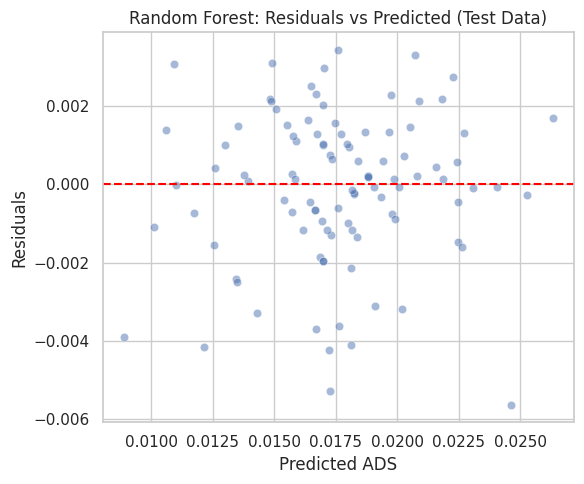

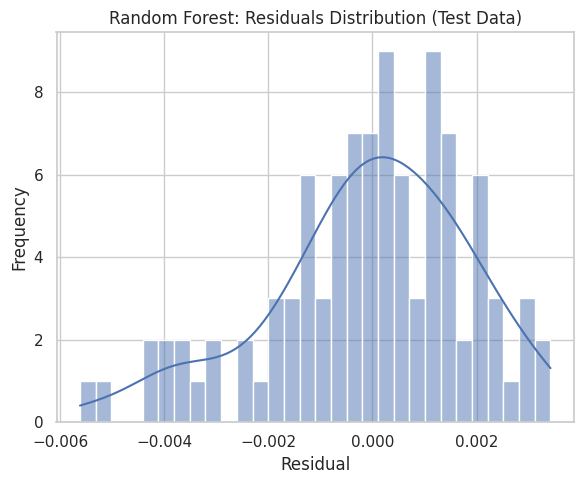

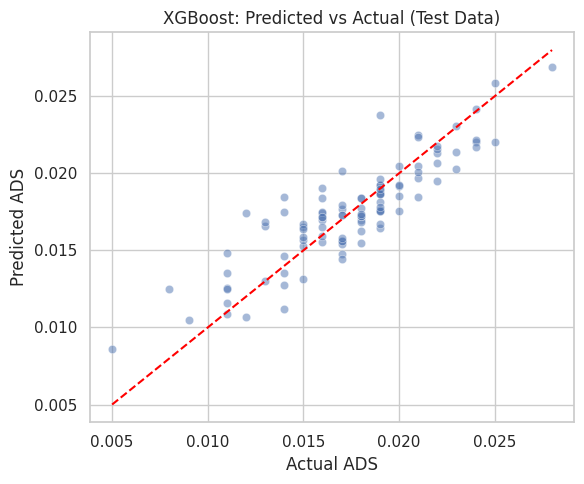

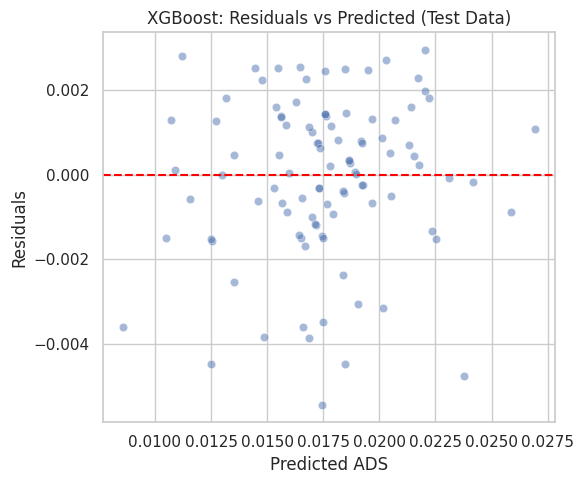

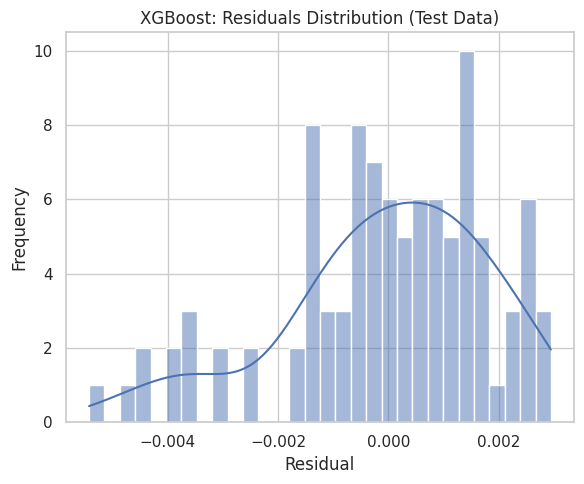

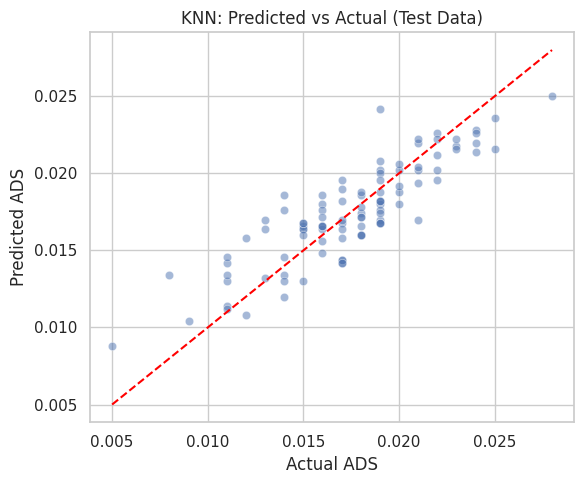

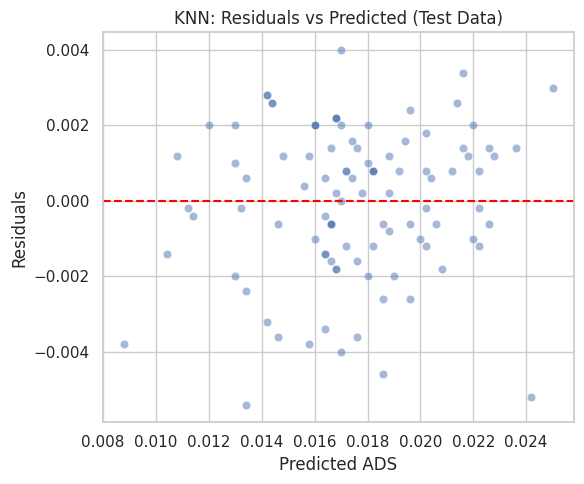

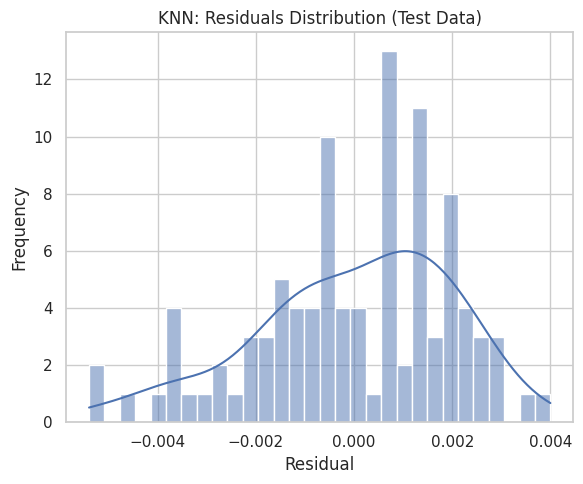

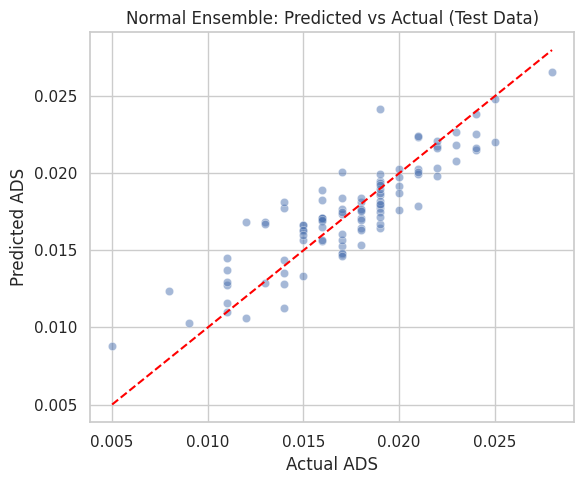

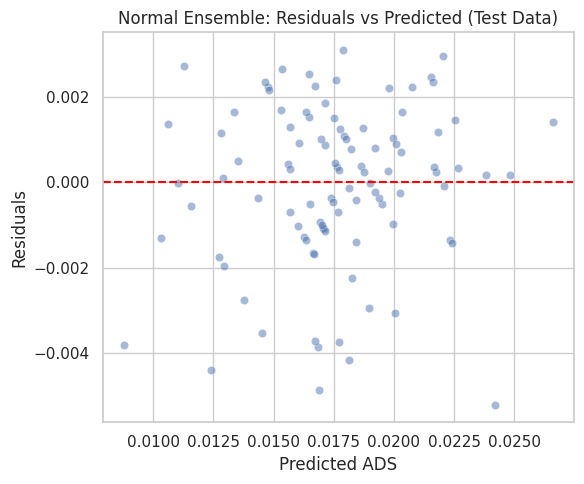

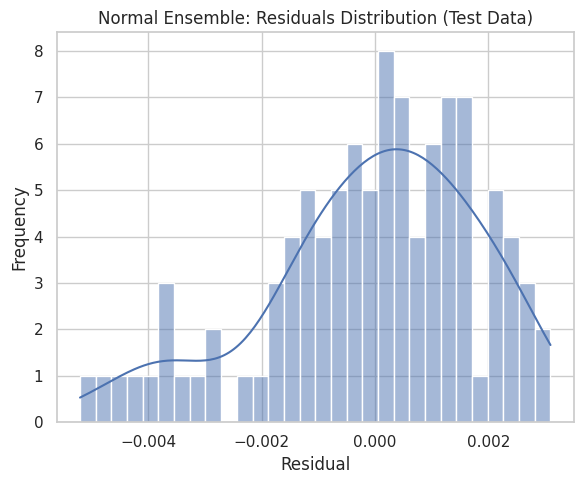

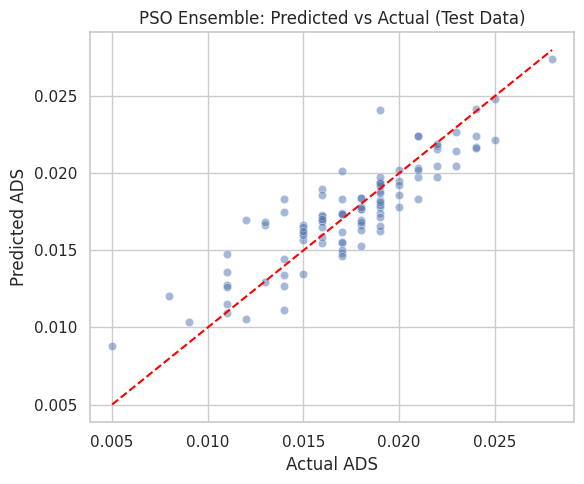

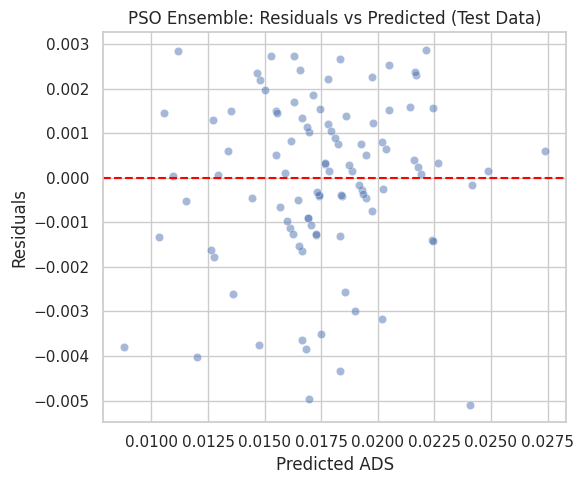

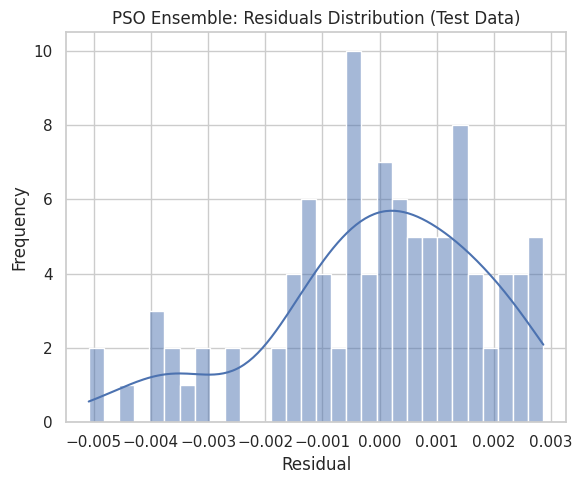

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of model predictions
model_predictions = {
    'Linear Regression': y_pred_lr_new,
    'Random Forest': y_pred_rf_new,
    'XGBoost': y_pred_xgb_new,
    'KNN': y_pred_knn_new,
    'Normal Ensemble': y_pred_normal_ensemble,
    'PSO Ensemble': y_pred_pso_ensemble
}

# Plotting loop
for model_name, y_pred in model_predictions.items():
    residuals = y_test_new - y_pred

    # 1. Predicted vs Actual
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test_new, y=y_pred, alpha=0.5)
    plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], '--', color='red')
    plt.xlabel("Actual ADS")
    plt.ylabel("Predicted ADS")
    plt.title(f"{model_name}: Predicted vs Actual (Test Data)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Residuals vs Predicted
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Predicted ADS")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residuals vs Predicted (Test Data)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3. Histogram of Residuals
    plt.figure(figsize=(6, 5))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"{model_name}: Residuals Distribution (Test Data)")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Predicted vs Actual (All Models in One Plot)

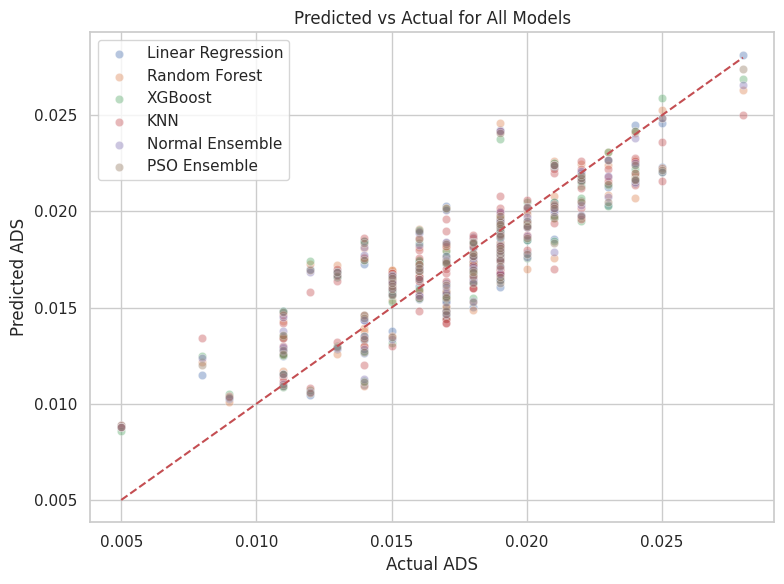

In [56]:
plt.figure(figsize=(8, 6))
for model_name, y_pred in model_predictions.items():
    sns.scatterplot(x=y_test_new, y=y_pred, alpha=0.4, label=model_name)

plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--')
plt.xlabel("Actual ADS")
plt.ylabel("Predicted ADS")
plt.title("Predicted vs Actual for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Residuals vs Predicted (All Models Together)

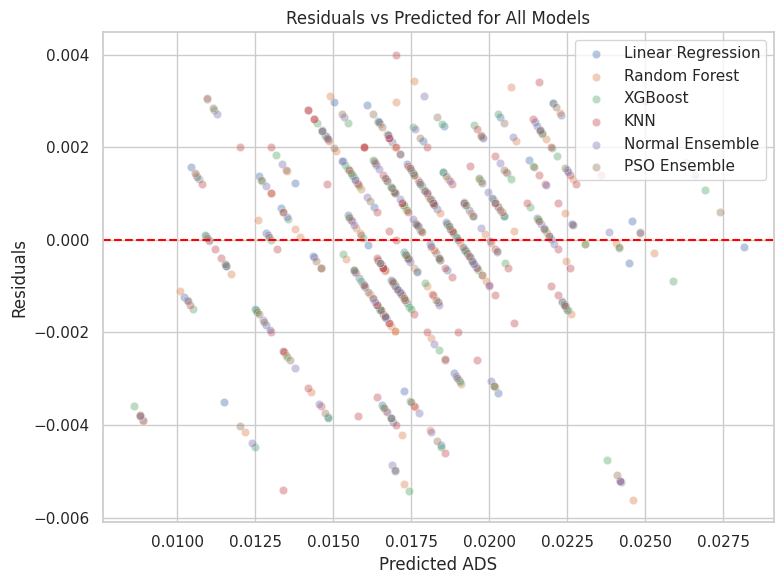

In [57]:
plt.figure(figsize=(8, 6))
for model_name, y_pred in model_predictions.items():
    residuals = y_test_new - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, label=model_name)

plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted ADS")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Histogram of Residuals (Overlaid)

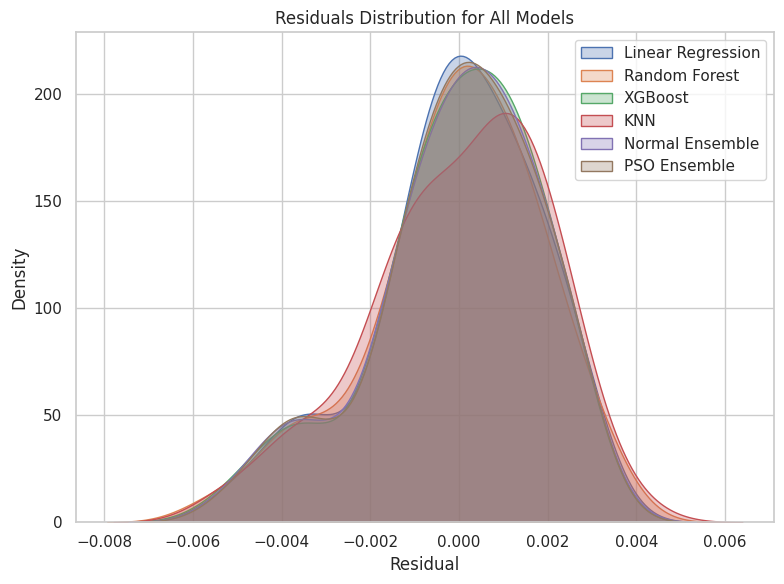

In [58]:
plt.figure(figsize=(8, 6))
for model_name, y_pred in model_predictions.items():
    residuals = y_test_new - y_pred
    sns.kdeplot(residuals, fill=True, label=model_name, alpha=0.3)

plt.title("Residuals Distribution for All Models")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


 Bar Plot of Evaluation Metrics (R², MAE, MSE)

/tmp/ipython-input-59-1915526000.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=metrics_df, palette='viridis')


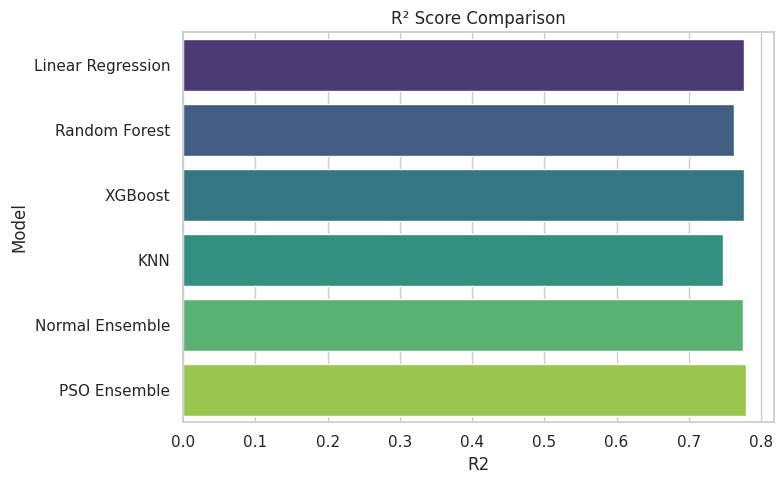

/tmp/ipython-input-59-1915526000.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=metrics_df, palette='magma')


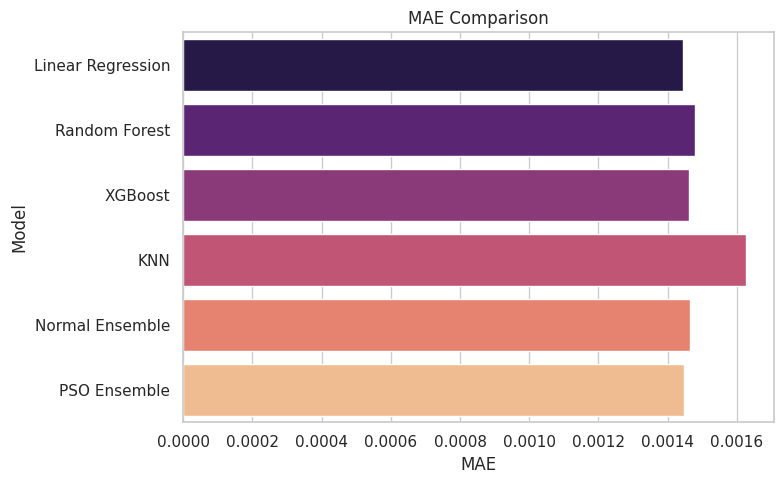

/tmp/ipython-input-59-1915526000.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=metrics_df, palette='plasma')


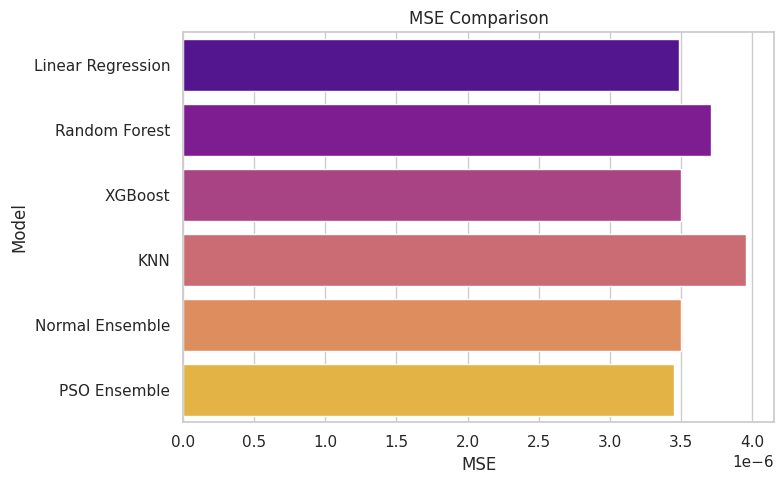

In [59]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

metrics_data = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R2": []
}

for model_name, y_pred in model_predictions.items():
    metrics_data["Model"].append(model_name)
    metrics_data["MAE"].append(mean_absolute_error(y_test_new, y_pred))
    metrics_data["MSE"].append(mean_squared_error(y_test_new, y_pred))
    metrics_data["R2"].append(r2_score(y_test_new, y_pred))

metrics_df = pd.DataFrame(metrics_data)

# Bar plot for R2
plt.figure(figsize=(8, 5))
sns.barplot(x='R2', y='Model', data=metrics_df, palette='viridis')
plt.title("R² Score Comparison")
plt.tight_layout()
plt.show()

# Bar plot for MAE
plt.figure(figsize=(8, 5))
sns.barplot(x='MAE', y='Model', data=metrics_df, palette='magma')
plt.title("MAE Comparison")
plt.tight_layout()
plt.show()

# Bar plot for MSE
plt.figure(figsize=(8, 5))
sns.barplot(x='MSE', y='Model', data=metrics_df, palette='plasma')
plt.title("MSE Comparison")
plt.tight_layout()
plt.show()
